In [2]:
using LinearAlgebra;
using StaticArrays;
using Makie
using CairoMakie
using Printf
using Markdown


In [10]:
"""
    H(k, M) -> Matrix{Complex{Float64}}
    Hamiltonian for the QWZ Model 
"""
@inline function H(k::Vector{Float64}, M::Float64)
    kx = k[1]; ky = k[2];
    Mz = M + cos(kx) + cos(ky);
    [Mz sin(kx)-im*sin(ky); sin(kx)+im*sin(ky) -Mz]
end

@inline function evals(k::Vector{Float64}, M::Float64)
    kx = k[1]; ky = k[2];
    Mz = M + cos(kx) + cos(ky);
    eigvals([Mz sin(kx)-im*sin(ky); sin(kx)+im*sin(ky) -Mz])
end

@inline function eigensystem_QWZ(k::Vector{Float64}, M::Float64)
    kx = k[1]; ky = k[2];
    Mz = M + cos(kx) + cos(ky);
    eigen(Hermitian([Mz sin(kx)-im*sin(ky); sin(kx)+im*sin(ky) -Mz]))
end

"""
    plot_band_structure(M::Float64)
    Plot the band structure of the QWZ model
"""
function plot_bands3D_QWZ(;M::Float64, seedname::String = "QWZ_", title::String = "QWZ Model")
    # construction of the grid 
    npts_perdim = 300
    rng = LinRange(-pi, pi, npts_perdim)
    grid = Matrix{Vector{Float64}}(undef, npts_perdim, npts_perdim)
    for (n, kx) ∈ enumerate(rng)
        for (m, ky) ∈ enumerate(rng)
            grid[n, m] = [kx, ky]
        end
    end    


    E = evals.(grid, Ref(M))
    ek_1 = map(x -> x[1], E)
    ek_2 = map(x -> x[2], E)
    
    kxs = reshape(map(e->e[1], grid), (npts_perdim, npts_perdim))
    kys = reshape(map(e->e[2], grid), (npts_perdim, npts_perdim))

    f = Figure()
    ax = Axis3(f[1, 1], title = title, elevation = pi / 40.0)


    Makie.surface!(ax, kxs, kys,  ek_1, colormap = :viridis)
    Makie.surface!(ax, kxs, kys, ek_2, colormap = :viridis)
    ax.xlabel = L"k_x"
    ax.ylabel = L"k_y"
    #Makie.save(assets_dir * seedname * "M=$M" * ".png", f)
    display(f)
end

plot_bands3D_QWZ

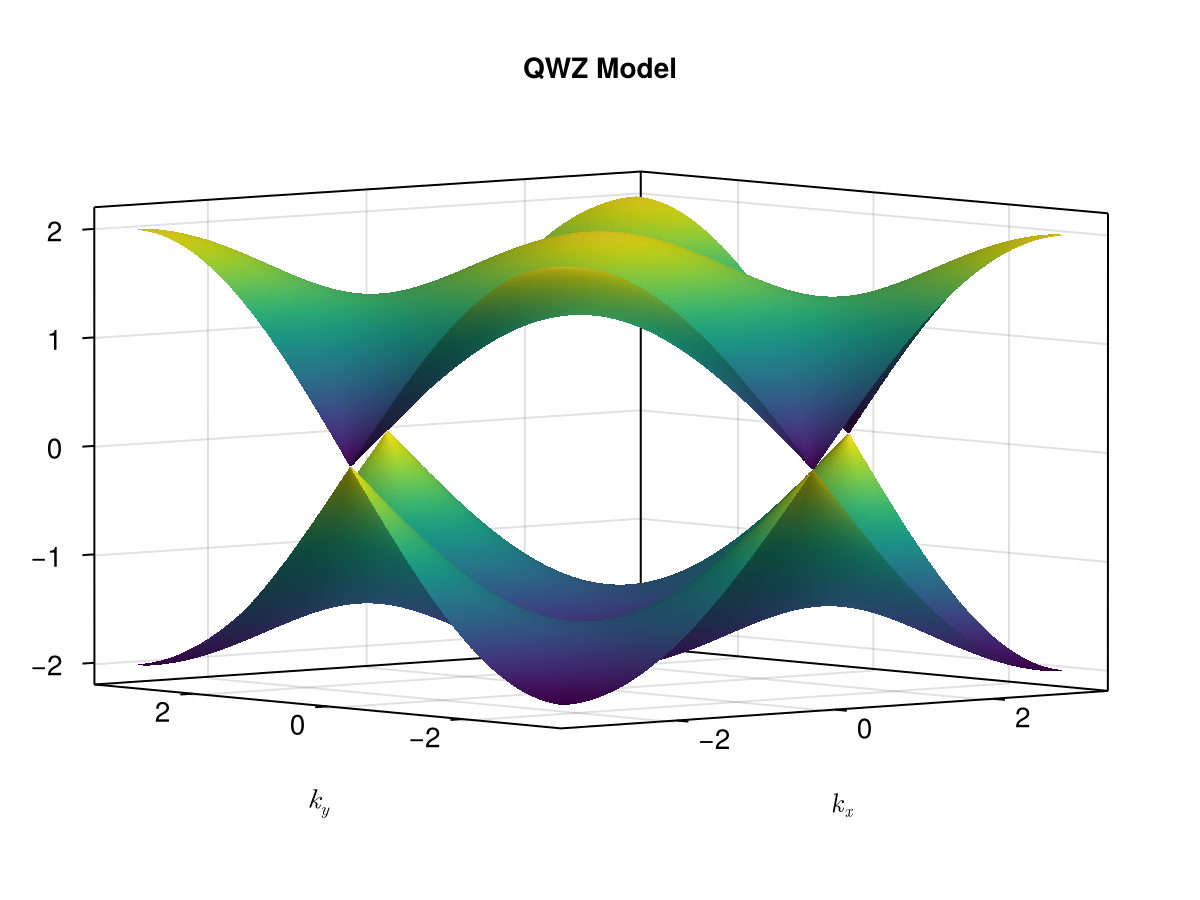

CairoMakie.Screen{IMAGE}


In [11]:
plot_bands3D_QWZ(M = 0.0)

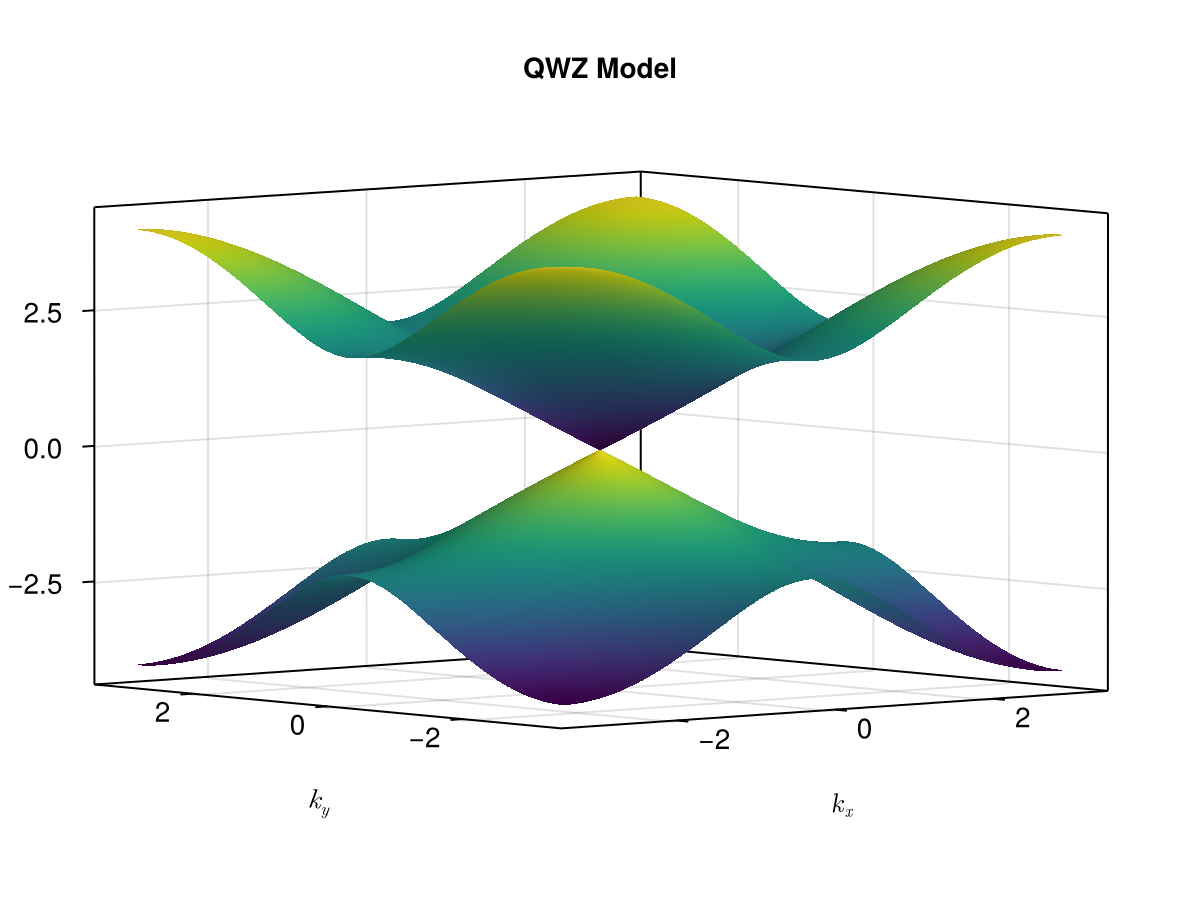

CairoMakie.Screen{IMAGE}


In [13]:
plot_bands3D_QWZ(M = -2.0)

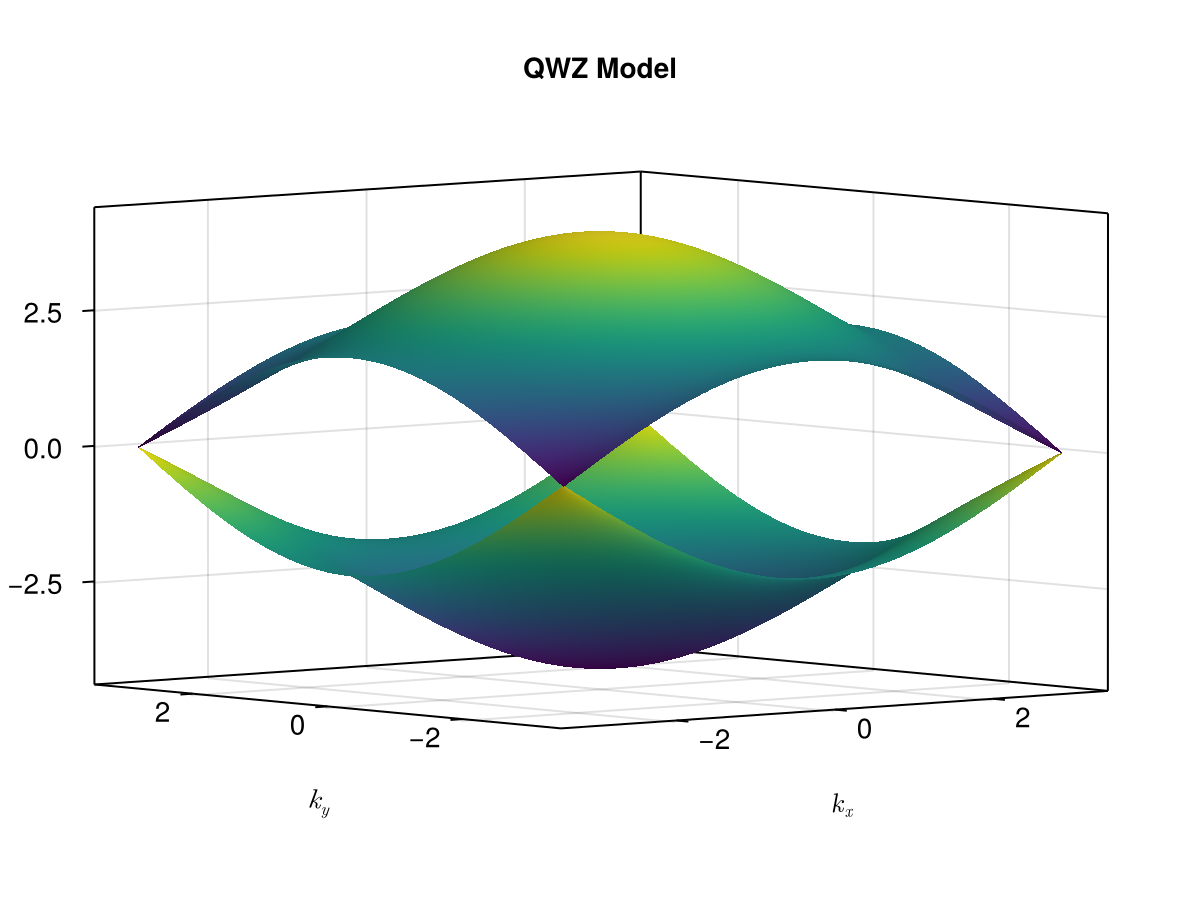

CairoMakie.Screen{IMAGE}


In [14]:
plot_bands3D_QWZ(M = 2.0)